In [29]:
import torch
import torch.nn as nn
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from collections import OrderedDict
from tqdm.notebook import trange

In [30]:
Nn = 2
model = nn.Sequential(OrderedDict([
    ('linr1',nn.Linear(1, Nn)),
    ('tanh1',nn.Tanh()),
    ('linr2',nn.Linear(Nn, Nn)),
    ('tanh2',nn.Tanh()),
    ('linr3',nn.Linear(Nn, 1))
    ]) )

print(model)

Sequential(
  (linr1): Linear(in_features=1, out_features=2, bias=True)
  (tanh1): Tanh()
  (linr2): Linear(in_features=2, out_features=2, bias=True)
  (tanh2): Tanh()
  (linr3): Linear(in_features=2, out_features=1, bias=True)
)


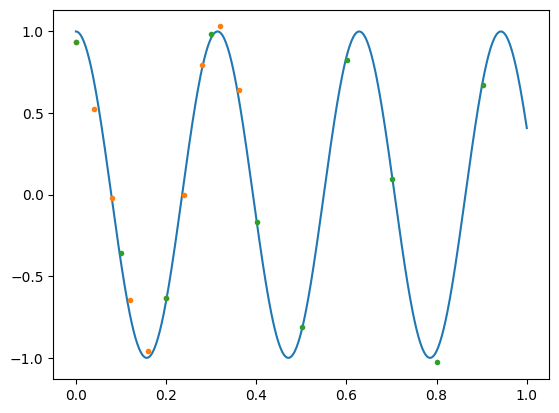

In [31]:
def osc(d, w0, x, noise = 0): # HO function
    w = np.sqrt(w0**2 - d**2)
    phi = np.arctan(-d/w)
    amp = 1./(2*np.cos(phi))
    err = noise * np.random.normal(0, 1, size=x.shape)
    return 2*amp * torch.exp(-d*x) * torch.cos(w*x + phi) + err

d, w0, noise = 0.0, 20.0, 0.05
physicsratio = 1e-5

x = torch.linspace(0, 1, 500).view(-1, 1)
y = osc(d, w0, x, noise = noise).view(-1, 1)
ytrue = osc(d, w0, x).view(-1, 1)
xtrain = x[0:200:20]
ytrain = y[0:200:20]
xphysics = x[0:500:50].requires_grad_()
yphysics = y[0:500:50].requires_grad_()

plt.plot(x, ytrue, label='truth')
plt.plot(xtrain, ytrain, '.', label='train')
plt.plot(xphysics.detach().numpy(), yphysics.detach().numpy(), '.', label='truth')

  0%|          | 0/5000 [00:00<?, ?it/s]

tensor([[-4.1365],
        [-2.1367]])
tensor([ 1.2890, -0.0094])


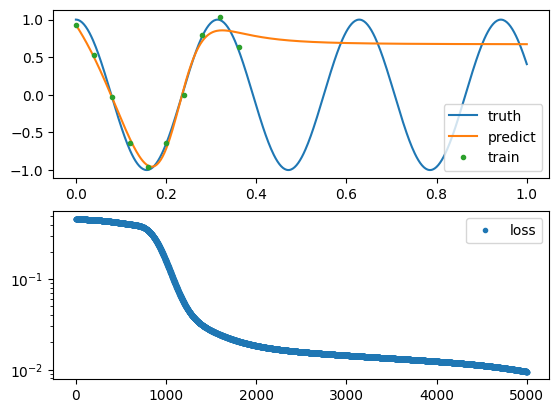

In [34]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
epochs = 5000

losses = []  # save losses from each epoch
for i in trange(epochs): # loop over gradient descent steps

    optimizer.zero_grad() # zero gradients of parameters v loss function
    ypred = model(xtrain) # calculate output from input w/ current parameters
    loss = torch.mean( ( ypred-ytrain )**2 ) # calculate loss
    loss.backward()  # calculate gradients
    optimizer.step()  # step NN parameters

    losses.append(loss.detach().numpy())

ypred = model(x).detach().numpy()
print(model.linr1.weight.data)
print(model.linr1.bias.data)

figs, axes = plt.subplots(2)
axes[0].plot(x, ytrue, label='truth')
axes[0].plot(x, ypred, label='predict')
axes[0].plot(xtrain, ytrain, '.', label='train')
axes[0].legend()

axes[1].semilogy(losses, '.', label='loss')
axes[1].legend()


In [33]:
    yphysics = model(xphysics)  # evaluate our model at the physics loss locations
    dx = torch.autograd.grad(yphysics, xphysics, torch.ones_like(yphysics), create_graph=True)[0]  # dy/dx
    dx2 = torch.autograd.grad(dx, xphysics, torch.ones_like(dx), create_graph=True)[0]  # d^2y/dx^2
    physics = dx2 + 2.*d*dx + w0**2*yphysics  # ODE
    loss2 = torch.mean(physics**2) * physicsratio
    loss = loss1 + loss2


print(" number of layers ", len( list(model.children()) ) )
for layer in model.children():
    print("layer name : ", layer)
    if isinstance(layer, nn.Linear):
        print("weights : ", layer.state_dict()['weight'])
        print("biases : ", layer.state_dict()['bias'])

IndentationError: ignored